***ПРАКТИКА***

Импортируем библиотеки, которые нам понадобятся (*pandas* для работы с данными, *numpy* для математических преобразований, *matplotlib* и *seaborn* для визуализации):

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем наши данные и выведем первые пять строк таблицы с помощью **head()**, чтобы убедиться в том, что всё подгрузилось верно:

In [84]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


![Alt text](<практика (diabetes).png>)

Дополнительно посмотрим на последние пять строк таблицы с помощью **tail():**

In [85]:
display(diabetes.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


Понимание данных с помощью метода **info():**

In [86]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


Понимание данных с помощью метода **describe():**

In [87]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Понимание данных с помощью атрибута **shape():**

In [88]:
diabetes.shape #Получить число строк и столбцов
diabetes.shape[0] #Получить только число строк
diabetes.shape[1] #Получить только число столбцов
print(diabetes.shape)
print(diabetes.shape[0])
print(diabetes.shape[1])

(778, 10)
778
10


Получить все столбцы и имена столбцов с помощью атрибута **columns:**

In [92]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Gender'],
      dtype='object')

Создадим копию *DataFrame* с помощью метода **copy():**

In [96]:
diabetes_1 = diabetes.copy()

**Задание 8.1**

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

Создадим новую таблицу *diabetes_dedupped*, которая будет версией исходной таблицы, очищенной от полных дубликатов.

In [99]:
dupl_columns = list(diabetes_1.columns)
#dupl_columns.remove('id')
mask = diabetes_1.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes_1[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')

diabetes_dedupped = diabetes_1.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


**Задание 8.2**

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите **0.95:** удалите все признаки, для которых **95 %** значений повторяются или **95 %** записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [106]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    #сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    #сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


**Примечание:** Дальнейшая работа производится с очищенными от дубликатов и неинформативных признаков данных.

Итак, нашелся один неинформативный признак. Теперь можно удалить его с помощью метода **drop()**, передав результирующий список в его аргументы.

In [109]:
information_diabetes = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes.shape[1]}')
display(information_diabetes)

Результирующее число признаков: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


**Задание 8.3**

Попробуйте найти пропуски в данных с помощью метода **isnull()**.

**Спойлер**: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* и *BMI* обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные **0**, в столбцах *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* и *BMI* на символ пропуска. Его вы можете взять из библиотеки **numpy: np.nan**.

Какая доля пропусков содержится в столбце *Insulin*? Ответ округлите до сотых.

In [115]:
#В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, 
#поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!
#Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска.
#Его вы можете взять из библиотеки numpy: np.nan.

#cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
#information_diabetes[cols] = information_diabetes[cols].replace(['0', 0], np.nan)
#information_diabetes

def nan_function(x):
    return np.nan if x == 0 else x
information_diabetes["Glucose"] = information_diabetes["Glucose"].apply(nan_function)
information_diabetes["BloodPressure"] = information_diabetes["BloodPressure"].apply(nan_function)
information_diabetes["SkinThickness"] = information_diabetes["SkinThickness"].apply(nan_function)
information_diabetes["Insulin"] = information_diabetes["Insulin"].apply(nan_function)
information_diabetes["BMI"] = information_diabetes["BMI"].apply(nan_function)
information_diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

**Задание 8.4**

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [119]:
thresh = information_diabetes.shape[0]*0.7
information_diabetes = information_diabetes.dropna(thresh=thresh, axis=1)
print(information_diabetes.shape[1])

8


**Задание 8.5**

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [133]:
df = information_diabetes.shape[1]
information_diabetes = information_diabetes.dropna(thresh=df-2, axis=0)
print(information_diabetes.shape[0])

761


**Задание 8.6**

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце *SkinThickness*? Ответ округлите до десятых.

In [142]:
#создаём словарь имя_столбца: число (признак), на который надо заменить пропуски 
values = {
    'Pregnancies': information_diabetes['Pregnancies'].median(),
    'Glucose': information_diabetes['Glucose'].median(),
    'BloodPressure': information_diabetes['BloodPressure'].median(),
    'SkinThickness': information_diabetes['SkinThickness'].median(),
    'BMI': information_diabetes['BMI'].median(),
    'DiabetesPedigreeFunction': information_diabetes['DiabetesPedigreeFunction'].median(),
    'Age': information_diabetes['Age'].median(),
    'Outcome': information_diabetes['Outcome'].median()
}
#заполняем оставшиеся записи константами в соответствии со словарем values
information_diabetes = information_diabetes.fillna(values)
#выводим результирующую долю пропусков
display(information_diabetes.mean().round(1))

Pregnancies                   3.8
Glucose                     121.9
BloodPressure                72.4
SkinThickness                29.1
BMI                          32.5
DiabetesPedigreeFunction      0.5
Age                          33.3
Outcome                       0.4
dtype: float64

**Задание 8.7**

Сколько выбросов найдёт классический метод межквартильного размаха в признаке *SkinThickness*?

In [148]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(information_diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


**Задание 8.8**

Сколько выбросов найдёт классический метод z-отклонения в признаке *SkinThickness*?

In [149]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(information_diabetes, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


**Задание 8.9**

На приведённой гистограмме показано распределение признака *DiabetesPedigreeFunction*. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке *DiabetesPedigreeFunction* с помощью классического метода межквартильного размаха.



![Гистограмма к заданию 8.9-2.png](<attachment:Гистограмма к заданию 8.9-2.png>)
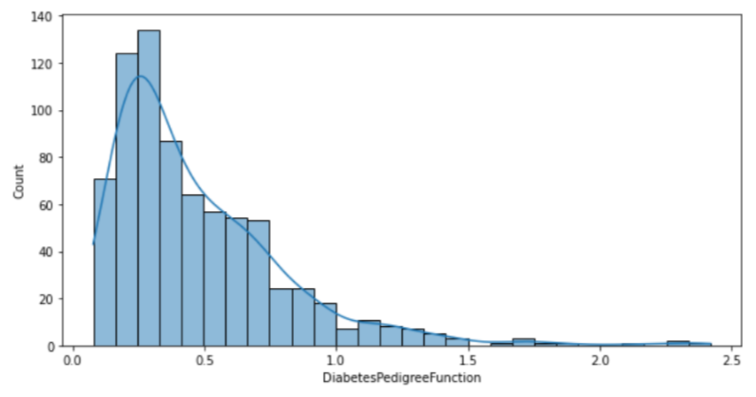

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [152]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(information_diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(information_diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0])
print(outliers_log.shape[0])
print(outliers.shape[0] - outliers_log.shape[0])

29
0
29
